<a href="https://colab.research.google.com/github/Russo-Federico/ML-Projects/blob/main/MLflow/MLflow-experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a machine learning model and track with MLflow

In [4]:
!pip install mlflow

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import mlflow

from google.colab import userdata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

environment setup

In [6]:
# retrieving kaggle secrets
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

load data

In [7]:
# Download latest version
path = kagglehub.dataset_download("mdsultanulislamovi/student-stress-monitoring-datasets")
path = os.path.join(path, "StressLevelDataset.csv")
df = pd.read_csv(path)
df.describe()

Using Colab cache for faster access to the 'student-stress-monitoring-datasets' dataset.


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [8]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


train test split

In [9]:
X, y = df.drop("stress_level", axis=1), df["stress_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

## MLflow

### Setup experiment using MLflow

In [10]:
experiment_name = "experiment-stress"
mlflow.set_experiment(experiment_name)

2025/09/09 14:27:57 INFO mlflow.tracking.fluent: Experiment with name 'experiment-stress' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/723479102930180698', creation_time=1757428077878, experiment_id='723479102930180698', last_update_time=1757428077878, lifecycle_stage='active', name='experiment-stress', tags={}>

### Monitor MLflow training run

In [11]:
# start a new training run
with mlflow.start_run():
   mlflow.autolog()

   model = LinearRegression()
   model.fit(X_train, y_train)

   mlflow.log_param("estimator", "LinearRegression")

2025/09/09 14:28:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/09/09 14:28:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/09/09 14:28:03 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/09/09 14:28:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/09/09 14:28:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) tha

In [12]:
# new training run with a different ML model
with mlflow.start_run():
   mlflow.autolog()

   model = DecisionTreeRegressor(max_depth=5)
   model.fit(X_train, y_train)

   mlflow.log_param("estimator", "DecisionTreeRegressor")

2025/09/09 14:28:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/09/09 14:28:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/09/09 14:28:17 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/09/09 14:28:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/09/09 14:28:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) tha

### Search and view experiments using MLflow

In [13]:
# retrieve all experiments
experiments = mlflow.search_experiments()
for exp in experiments:
    print(exp.name)

experiment-stress
Default


In [14]:
# retrieve a specific experiment
experiment_name = "experiment-stress"
exp = mlflow.get_experiment_by_name(experiment_name)
print(exp)

<Experiment: artifact_location='file:///content/mlruns/723479102930180698', creation_time=1757428077878, experiment_id='723479102930180698', last_update_time=1757428077878, lifecycle_stage='active', name='experiment-stress', tags={}>


In [15]:
# retrieve all runs from a set experiment
mlflow.search_runs(exp.experiment_id)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_score,metrics.training_root_mean_squared_error,metrics.training_r2_score,metrics.training_mean_squared_error,...,params.n_jobs,params.fit_intercept,params.copy_X,params.positive,tags.mlflow.source.type,tags.estimator_class,tags.mlflow.user,tags.estimator_name,tags.mlflow.runName,tags.mlflow.source.name
0,ad4003548ccb44c3bd92f9550fd38d07,723479102930180698,FINISHED,file:///content/mlruns/723479102930180698/ad40...,2025-09-09 14:28:17.558000+00:00,2025-09-09 14:28:21.013000+00:00,0.901486,0.257650,0.901486,0.066384,...,None,None,None,None,LOCAL,sklearn.tree._classes.DecisionTreeRegressor,root,DecisionTreeRegressor,sneaky-mouse-406,/usr/local/lib/python3.12/dist-packages/colab_...
1,ab4f3b3549da4f42b7546134b7faf751,723479102930180698,FINISHED,file:///content/mlruns/723479102930180698/ab4f...,2025-09-09 14:27:58.263000+00:00,2025-09-09 14:28:17.547000+00:00,0.803484,0.363899,0.803484,0.132422,...,None,True,True,False,LOCAL,sklearn.linear_model._base.LinearRegression,root,LinearRegression,aged-calf-259,/usr/local/lib/python3.12/dist-packages/colab_...


In [16]:
# order runs by start time, max two results
mlflow.search_runs(exp.experiment_id, order_by=["start_time DESC"], max_results=2)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_score,metrics.training_root_mean_squared_error,metrics.training_r2_score,metrics.training_mean_squared_error,...,params.n_jobs,params.fit_intercept,params.copy_X,params.positive,tags.mlflow.source.type,tags.estimator_class,tags.mlflow.user,tags.estimator_name,tags.mlflow.runName,tags.mlflow.source.name
0,ad4003548ccb44c3bd92f9550fd38d07,723479102930180698,FINISHED,file:///content/mlruns/723479102930180698/ad40...,2025-09-09 14:28:17.558000+00:00,2025-09-09 14:28:21.013000+00:00,0.901486,0.257650,0.901486,0.066384,...,None,None,None,None,LOCAL,sklearn.tree._classes.DecisionTreeRegressor,root,DecisionTreeRegressor,sneaky-mouse-406,/usr/local/lib/python3.12/dist-packages/colab_...
1,ab4f3b3549da4f42b7546134b7faf751,723479102930180698,FINISHED,file:///content/mlruns/723479102930180698/ab4f...,2025-09-09 14:27:58.263000+00:00,2025-09-09 14:28:17.547000+00:00,0.803484,0.363899,0.803484,0.132422,...,None,True,True,False,LOCAL,sklearn.linear_model._base.LinearRegression,root,LinearRegression,aged-calf-259,/usr/local/lib/python3.12/dist-packages/colab_...


### Plot metrics of different runs for comparison

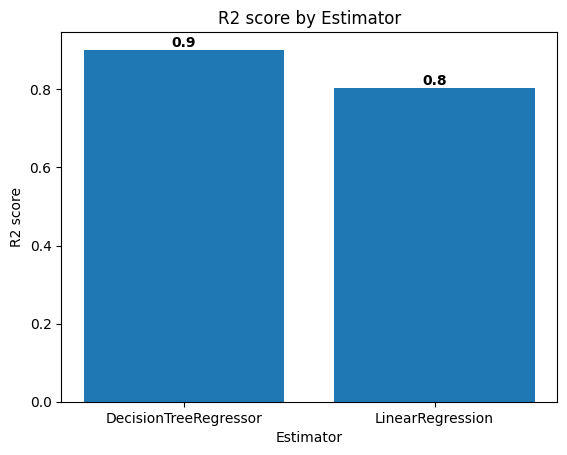

In [17]:
df_results = mlflow.search_runs(exp.experiment_id, order_by=["start_time DESC"], max_results=2)[["metrics.training_r2_score", "params.estimator"]]

fig, ax = plt.subplots()
ax.bar(df_results["params.estimator"], df_results["metrics.training_r2_score"])
ax.set_xlabel("Estimator")
ax.set_ylabel("R2 score")
ax.set_title("R2 score by Estimator")
for i, v in enumerate(df_results["metrics.training_r2_score"]):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')
plt.show()

N.B.
data and metadata about the models are saved in the files section and can be explored freely

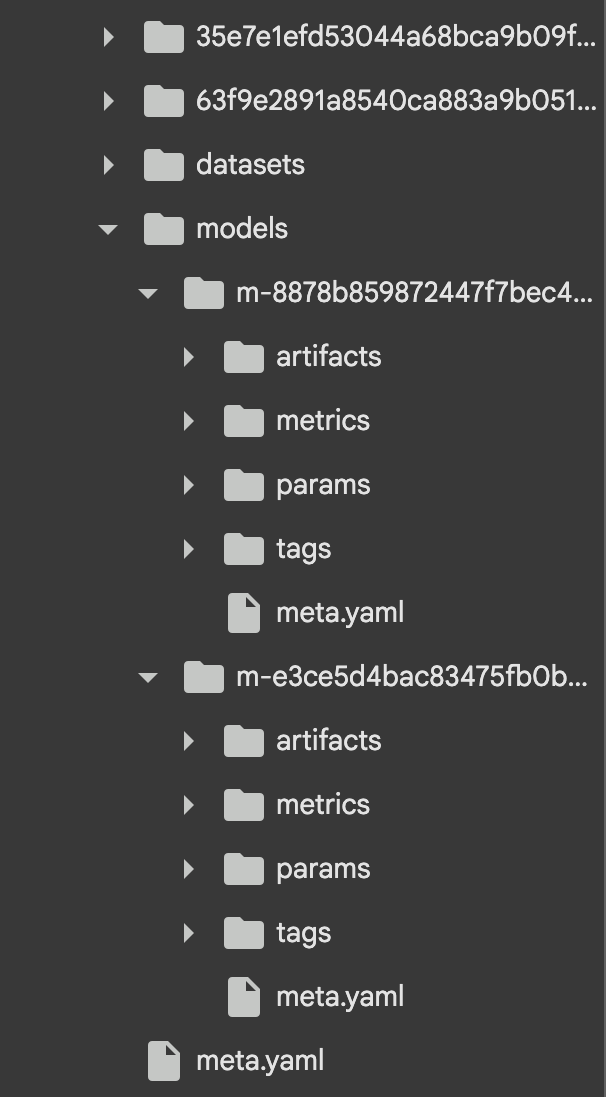